In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
feature=pd.read_csv('features.csv')
stores=pd.read_csv('stores.csv')

In [ ]:
train=train.merge(feature,on=['Store','Date','IsHoliday'],how='left')
train=train.merge(stores,on=['Store'],how='left')

In [ ]:
test=test.merge(feature,on=['Store','Date','IsHoliday'],how='left')
test=test.merge(stores,on=['Store'],how='left')

In [ ]:
test['Date']=pd.to_datetime(test['Date'])
train['Date']=pd.to_datetime(train['Date'])

In [ ]:
test['Year']=test['Date'].dt.year
test['Month']=test['Date'].dt.month
test['Week']=test['Date'].dt.isocalendar().week
test['Day']=test['Date'].dt.day

In [ ]:
train['Year']=train['Date'].dt.year
train['Month']=train['Date'].dt.month
train['Week']=train['Date'].dt.isocalendar().week
train['Day']=train['Date'].dt.day

In [ ]:
train.shape

(421570, 20)

In [ ]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week,Day
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,5
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,2010,2,6,12
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,2010,2,7,19
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,2010,2,8,26
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,2010,3,9,5


In [ ]:
datatypes=train.dtypes
datatypes

,0
Store,int64
Dept,int64
Date,datetime64[ns]
Weekly_Sales,float64
IsHoliday,bool
Temperature,float64
Fuel_Price,float64
MarkDown1,float64
MarkDown2,float64
MarkDown3,float64


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
train['IsHoliday']=le.fit_transform(train['IsHoliday'])

In [ ]:
train['Type']=le.fit_transform(train['Type'])

In [ ]:
test.shape

(115064, 19)

In [ ]:
test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week,Day
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,2012,11,44,2
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,A,151315,2012,11,45,9
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,A,151315,2012,11,46,16
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,A,151315,2012,11,47,23
4,1,1,2012-11-30,False,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,A,151315,2012,11,48,30


In [ ]:
datatypes=test.dtypes
datatypes

,0
Store,int64
Dept,int64
Date,datetime64[ns]
IsHoliday,bool
Temperature,float64
Fuel_Price,float64
MarkDown1,float64
MarkDown2,float64
MarkDown3,float64
MarkDown4,float64


In [ ]:
test['IsHoliday']=le.fit_transform(test['IsHoliday'])

In [ ]:
test['Type']=le.fit_transform(test['Type'])

In [ ]:
train = train.sort_values(['Store', 'Dept', 'Date'])

train['Sales_Lag_1'] = train.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(1)

train['Rolling_Mean_4'] = train.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(lambda x: x.rolling(4).mean())

test = test.sort_values(['Store', 'Dept', 'Date'])

test['Sales_Lag_1'] = test.groupby(['Store', 'Dept'])['Temperature'].shift(1) #Using Temperature as placeholder as Weekly_Sales is not in test set

test['Rolling_Mean_4'] = test.groupby(['Store', 'Dept'])['Temperature'].transform(lambda x: x.rolling(4).mean()) #Using Temperature as placeholder as Weekly_Sales is not in test set

train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

In [ ]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,CPI,Unemployment,Type,Size,Year,Month,Week,Day,Sales_Lag_1,Rolling_Mean_4
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,...,211.096358,8.106,0,151315,2010,2,5,5,0.00,0.00
1,1,1,2010-02-12,46039.49,1,38.51,2.548,0.0,0.0,0.0,...,211.242170,8.106,0,151315,2010,2,6,12,24924.50,0.00
2,1,1,2010-02-19,41595.55,0,39.93,2.514,0.0,0.0,0.0,...,211.289143,8.106,0,151315,2010,2,7,19,46039.49,0.00
3,1,1,2010-02-26,19403.54,0,46.63,2.561,0.0,0.0,0.0,...,211.319643,8.106,0,151315,2010,2,8,26,41595.55,32990.77
4,1,1,2010-03-05,21827.90,0,46.50,2.625,0.0,0.0,0.0,...,211.350143,8.106,0,151315,2010,3,9,5,19403.54,32216.62


In [ ]:
features = [
    'Sales_Lag_1',
    'Rolling_Mean_4',
    'Dept',
    'Week',
    'Day',
    'Size',
    'IsHoliday'
]

In [ ]:
X=train[features]
y=train['Weekly_Sales']

In [ ]:
train = train.sort_values('Date')

cutoff_date = '2012-01-01'

X_train = train[train['Date'] < cutoff_date][features]
y_train = train[train['Date'] < cutoff_date]['Weekly_Sales']

X_val = train[train['Date'] >= cutoff_date][features]
y_val = train[train['Date'] >= cutoff_date]['Weekly_Sales']


In [ ]:
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 8772014.44
Root Mean Squared Error: 2961.76
R² Score: 0.98


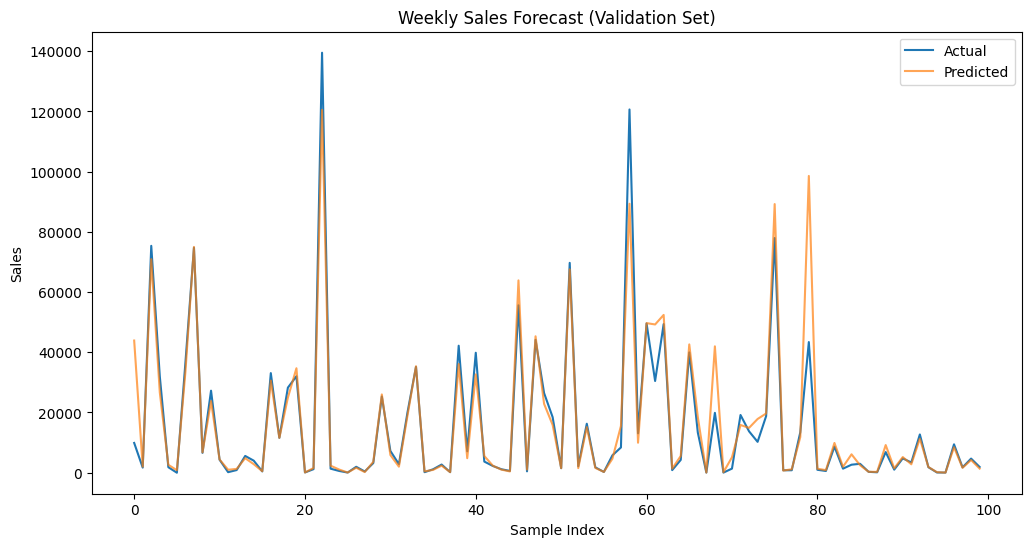

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_val.values[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted', alpha=0.7)
plt.legend()
plt.title('Weekly Sales Forecast (Validation Set)')
plt.xlabel('Sample Index')
plt.ylabel('Sales')
plt.show()

In [ ]:
X_test = test[features]
test['Weekly_Sales_Predicted'] = model.predict(X_test)

test[['Store', 'Dept', 'Date', 'Weekly_Sales_Predicted']].to_csv('test_predictions.csv', index=False)

In [ ]:
train['Weekly_Sales'].describe()

,Weekly_Sales
count,421570.000000
mean,15981.258123
std,22711.183519
min,-4988.940000
25%,2079.650000
50%,7612.030000
75%,20205.852500
max,693099.360000
